# FINAL PROJECT

Submitted By: Sarika Singhal

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

The data has been taken from www.kaggle.com

Link - https://www.kaggle.com/ronitf/heart-disease-uci

Authors of the Dataset - Ronit

Final Project - Requirements

Add the following to your GitHub repository.

Your dataset - DONE

A PowerPoint presentation outlining your statistical question/hypothesis - DONE

a. A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1). - DONE

b. Describe what the 5 variables mean in the dataset (Chapter 1). - DONE

c. Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). - DONE

d. Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2). - DONE
    
e. Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3). - DONE

f. Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4). - DONE

g. Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). DONE

h. Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7). - DONE

i. Conduct a test on your hypothesis using one of the methods covered in Chapter 9. - DONE

j. For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). - DONE

Your code or screenshots of your code - DONE

A 250-500-word paper summarizing the following: Statistical/Hypothetical Question - DONE a. Outcome of your EDA

b. What do you feel was missed during the analysis?

c. Were there any variables you felt could have helped in the analysis?

d. Were there any assumptions made you felt were incorrect?

e. What challenges did you face, what did you not fully understand?

Submit a link to your repository to the assignment link during the final week of class. - DONE

# Start Solution
Reading the Clinical File and Converting to Dataframe

In [2]:
import pandas;
def readFile(f="heart.csv", seperator=","):
    print("START READING")
    df = pandas.read_csv(f,sep=seperator)
    print("END READING")
    return df
    
clinical_df = readFile()
   
print(clinical_df)

START READING
END READING
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  

In [5]:
clinical_df.shape

(303, 14)

In [6]:
clinical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
clinical_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
import thinkstats2
import thinkplot

In [10]:
# creating separate df from male and female patients

male = clinical_df[clinical_df.sex == 1]
female = clinical_df[clinical_df.sex == 0]
print("Male:",len(male))
print("Female:",len(female))
print("TOTAL:",len(clinical_df))

Male: 207
Female: 96
TOTAL: 303


Histograms for the variables being analysed

Age of Patient

trestbps (resting blood pressure)

chol (serum cholestoral in mg/dl)

fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

thalach (maximum heart rate achieved)

exang (exercise induced angina (1 = yes; 0 = no))

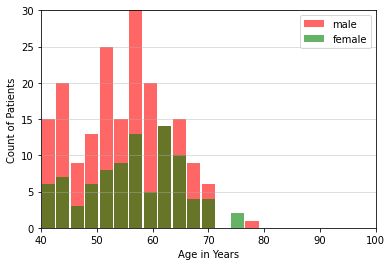

In [11]:
import matplotlib.pyplot as plt
import numpy as np;

# Histogram plots for Age of Patient
binBoundaries = np.linspace(40,100,24)
plt.hist(x=male.age, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "male")
plt.hist(x=female.age, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Age in Years')
plt.ylabel('Count of Patients')
plt.xlim(40,100)
plt.ylim(0,30)
plt.show()

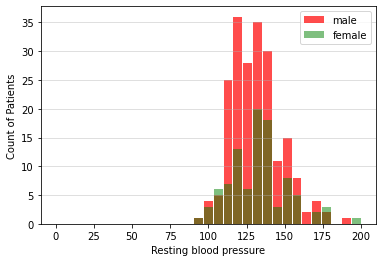

In [12]:
# Histogram plots for trestbps
binBoundaries = np.linspace(0,200,32)
plt.hist(x=male.trestbps, bins=binBoundaries, color='red', alpha=0.7, rwidth=0.9, label = "male")
plt.hist(x=female.trestbps, bins=binBoundaries, color='green', alpha=0.5, rwidth=0.9, label = "female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Resting blood pressure')
plt.ylabel('Count of Patients')
#plt.xlim(40,100)
#plt.ylim(0,30)
plt.show()

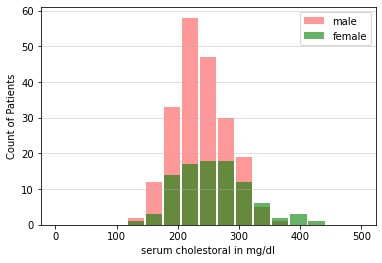

In [15]:
# Histogram plots for serum cholestoral in mg/dl
binBoundaries = np.linspace(0,500,18)
plt.hist(x=male.chol, bins=binBoundaries, color='red', alpha=0.4, rwidth=0.9, label = "male")
plt.hist(x=female.chol, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('serum cholestoral in mg/dl')
plt.ylabel('Count of Patients')
plt.show()

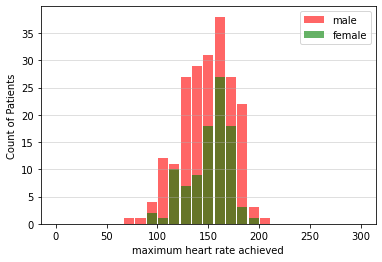

In [17]:
# Histogram plots for Maximum Heart Rate
binBoundaries = np.linspace(0, 300, 28)
plt.hist(x=male.thalach, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "male")
plt.hist(x=female.thalach, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('maximum heart rate achieved')
plt.ylabel('Count of Patients')
plt.show()

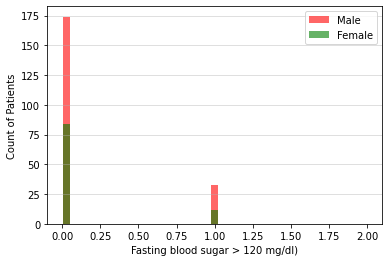

In [22]:
# Histogram plots for fasting blood sugar > 120 mg/dl
binBoundaries = np.linspace(0, 2, 40)
plt.hist(x=male.fbs, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Male")
plt.hist(x=female.fbs, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Fasting blood sugar > 120 mg/dl)')
plt.ylabel('Count of Patients')
plt.show()

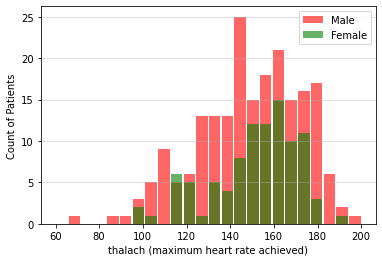

In [27]:
# Histogram plots for thalach (maximum heart rate achieved)
binBoundaries = np.linspace(60, 200, 25)
plt.hist(x=male.thalach, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Male")
plt.hist(x=female.thalach, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('thalach (maximum heart rate achieved)')
plt.ylabel('Count of Patients')
plt.show()

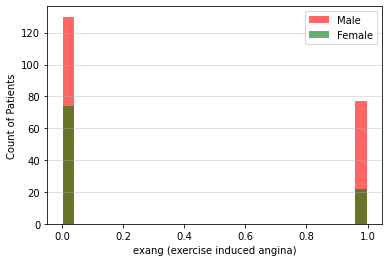

In [48]:
# Histogram plots for exang (exercise induced angina)
binBoundaries = np.linspace(0, 1, 25)
plt.hist(x=male.exang, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Male")
plt.hist(x=female.exang, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Female")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('exang (exercise induced angina)')
plt.ylabel('Count of Patients')
plt.show()

In [29]:
# Mean, Mode, Spread and Tails - Age of Patient
meanMale = male.age.mean()
meanFemale = female.age.mean()
modeMale = male.age.mode()
modeFemale = female.age.mode()
varMale = male.age.var()
varFemale = female.age.var()
stdMale = male.age.std()
stdFemale = female.age.std()

print("Mean Age (Male): ",meanMale)
print("Mean Age (Female): ",meanFemale)
print("Mode Age (Male): ",modeMale)
print("Mode Age (Female): ",modeFemale)
print("Variance Age (Male): ",varMale)
print("Variance Age (Female): ",varFemale)
print("Standard Deviation Age (Male): ",stdMale)
print("Standard Deviation Age (Female): ",stdFemale)

Mean Age (Male):  53.75845410628019
Mean Age (Female):  55.677083333333336
Mode Age (Male):  0    57
1    58
2    59
dtype: int64
Mode Age (Female):  0    62
dtype: int64
Variance Age (Male):  78.92195488016512
Variance Age (Female):  88.53673245614031
Standard Deviation Age (Male):  8.883802951448502
Standard Deviation Age (Female):  9.409395966593197


In [31]:
# Mean, Mode, Spread and Tails - Resting heart Rate
meanMale = male.trestbps.mean()
meanFemale = female.trestbps.mean()
modeMale = male.trestbps.mode()
modeFemale = female.trestbps.mode()
varMale = male.trestbps.var()
varFemale = female.trestbps.var()
stdMale = male.trestbps.std()
stdFemale = female.trestbps.std()

print("Mean Resting blood pressure (Male): ",meanMale)
print("Mean Resting blood pressure (Female): ",meanFemale)
print("Mode Resting blood pressure (Male): ",modeMale)
print("Mode Resting blood pressure (Female): ",modeFemale)
print("Variance Resting blood pressure (Male): ",varMale)
print("Variance Resting blood pressure (Female): ",varFemale)
print("Standard Deviation Resting blood pressure (Male): ",stdMale)
print("Standard Deviation Resting blood pressure (Female): ",stdFemale)

Mean Resting blood pressure (Male):  130.94685990338164
Mean Resting blood pressure (Female):  133.08333333333334
Mode Resting blood pressure (Male):  0    120
dtype: int64
Mode Resting blood pressure (Female):  0    130
dtype: int64
Variance Resting blood pressure (Male):  277.49716242202527
Variance Resting blood pressure (Female):  372.91929824561413
Standard Deviation Resting blood pressure (Male):  16.658246078805092
Standard Deviation Resting blood pressure (Female):  19.31111851358212


In [32]:
# Mean, Mode, Spread and Tails - fbs (fasting blood sugar)
meanMale = male.fbs.mean()
meanFemale = female.fbs.mean()
modeMale = male.fbs.mode()
modeFemale = female.fbs.mode()
varMale = male.fbs.var()
varFemale = female.fbs.var()
stdMale = male.fbs.std()
stdFemale = female.fbs.std()

print("Mean fasting blood sugar (Male): ",meanMale)
print("Mean fasting blood sugar (Female): ",meanFemale)
print("Mode fasting blood sugar (Male): ",modeMale)
print("Mode fasting blood sugar (Female): ",modeFemale)
print("Variance fasting blood sugar (Male): ",varMale)
print("Variance fasting blood sugar (Female): ",varFemale)
print("Standard fasting blood sugar (Male): ",stdMale)
print("Standard fasting blood sugar (Female): ",stdFemale)

Mean fasting blood sugar (Male):  0.15942028985507245
Mean fasting blood sugar (Female):  0.125
Mode fasting blood sugar (Male):  0    0
dtype: int64
Mode fasting blood sugar (Female):  0    0
dtype: int64
Variance fasting blood sugar (Male):  0.13465597298438123
Variance fasting blood sugar (Female):  0.11052631578947368
Standard fasting blood sugar (Male):  0.3669550013072192
Standard fasting blood sugar (Female):  0.33245498310218435


In [33]:
# Mean, Mode, Spread and Tails - thalach (maximum heart rate achieved)
meanMale = male.thalach.mean()
meanFemale = female.thalach.mean()
modeMale = male.thalach.mode()
modeFemale = female.thalach.mode()
varMale = male.thalach.var()
varFemale = female.thalach.var()
stdMale = male.thalach.std()
stdFemale = female.thalach.std()

print("Mean maximum heart rate achieved (Male)): ",meanMale)
print("Mean maximum heart rate achieved (Female): ",meanFemale)
print("Mode maximum heart rate achieved (Male): ",modeMale)
print("Mode maximum heart rate achieved (Female): ",modeFemale)
print("Variance maximum heart rate achieved (Male): ",varMale)
print("Variance maximum heart rate achieved (Female): ",varFemale)
print("Standard Deviation maximum heart rate achieved (Male): ",stdMale)
print("Standard Deviation maximum heart rate achieved (Female): ",stdFemale)

Mean maximum heart rate achieved (Male)):  148.96135265700482
Mean maximum heart rate achieved (Female):  151.125
Mode maximum heart rate achieved (Male):  0    132
1    144
2    162
3    173
dtype: int64
Mode maximum heart rate achieved (Female):  0    172
dtype: int64
Variance maximum heart rate achieved (Male):  582.299470006097
Variance maximum heart rate achieved (Female):  401.92105263157896
Standard Deviation maximum heart rate achieved (Male):  24.130882080978658
Standard Deviation maximum heart rate achieved (Female):  20.04796879066752


In [35]:
# Mean, Mode, Spread and Tails - exang (exercise induced angina)
meanMale = male.exang.mean()
meanFemale = female.exang.mean()
modeMale = male.exang.mode()
modeFemale = female.exang.mode()
varMale = male.exang.var()
varFemale = female.exang.var()
stdMale = male.exang.std()
stdFemale = female.exang.std()

print("Mean exang (exercise induced angina) (Male)): ",meanMale)
print("Mean exang (exercise induced angina) (Female)): ",meanFemale)
print("Mode exang (exercise induced angina) (Male)): ",modeMale)
print("Mode exang (exercise induced angina) (Female): ",modeFemale)
print("Variance exang (exercise induced angina) (Male)): ",varMale)
print("Variance exang (exercise induced angina) (Female)): ",varFemale)
print("Standard exang (exercise induced angina) (Male)): ",stdMale)
print("Standard exang (exercise induced angina) (female)): ",stdFemale)

Mean exang (exercise induced angina) (Male)):  0.3719806763285024
Mean exang (exercise induced angina) (Female)):  0.22916666666666666
Mode exang (exercise induced angina) (Male)):  0    0
dtype: int64
Mode exang (exercise induced angina) (Female):  0    0
dtype: int64
Variance exang (exercise induced angina) (Male)):  0.2347450870034233
Variance exang (exercise induced angina) (Female)):  0.17850877192982456
Standard exang (exercise induced angina) (Male)):  0.48450499172188444
Standard exang (exercise induced angina) (female)):  0.42250298452179547


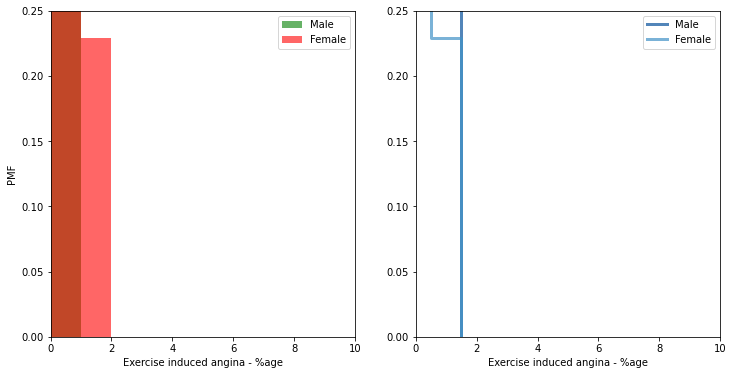

In [52]:
# Comparing exang (exercise induced angina) in Male vs Female Patients
pmfMaleEF = thinkstats2.Pmf(male.exang, label='Male')
pmfFemaleEF = thinkstats2.Pmf(female.exang, label='Female')

width=1
axis = [0, 10, 0, 0.25]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfMaleEF, align='right', width=width, color = 'green')
thinkplot.Hist(pmfFemaleEF, align='left', width=width, color = 'red')
thinkplot.Config(xlabel='Exercise induced angina - %age', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfMaleEF, pmfFemaleEF],width=width)
thinkplot.Config(xlabel='Exercise induced angina - %age', axis=axis)

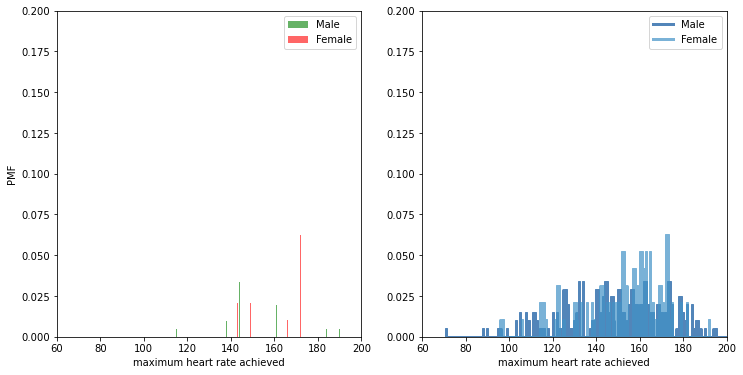

In [57]:
# Comparing thalach maximum heart rate achieved in Male vs Female Patients
pmfMaleSC = thinkstats2.Pmf(male.thalach, label='Male')
pmfFemaleSC = thinkstats2.Pmf(female.thalach, label='Female')

width=0.05
axis = [60, 200, 0, 0.20]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfMaleSC, align='right', width=width, color = 'green')
thinkplot.Hist(pmfFemaleSC, align='left', width=width, color ='red')
thinkplot.Config(xlabel='maximum heart rate achieved', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfMaleSC, pmfFemaleSC],width=width)
thinkplot.Config(xlabel='maximum heart rate achieved', axis=axis)

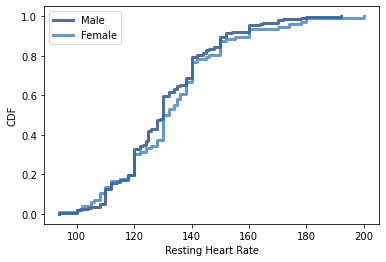

In [67]:
# CDF Plot for Resting Heart Rate for Male vs Female
cdfFMale = thinkstats2.Cdf(male.trestbps, label='Male')
cdfFFemale = thinkstats2.Cdf(female.trestbps, label='Female')
thinkplot.Cdf(cdfFMale)
thinkplot.Config(xlabel='Resting Heart Rate', ylabel='CDF', loc='upper left')
thinkplot.Cdf(cdfFFemale)
thinkplot.Config(xlabel='Resting Heart Rate', ylabel='CDF', loc='upper left')

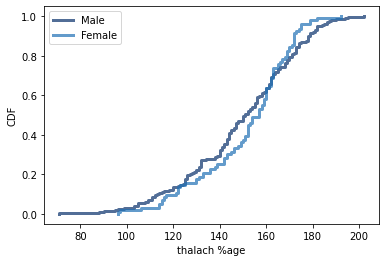

In [63]:
# CDF Plot for thalach (maximum heart rate achieved) for Male vs Female
cdfTMale = thinkstats2.Cdf(male.thalach, label='Male')
cdfTFemale = thinkstats2.Cdf(female.thalach, label='Female')
thinkplot.Cdf(cdfTMale)
thinkplot.Config(xlabel='thalach %age', ylabel='CDF', loc='upper left')
thinkplot.Cdf(cdfTFemale)
thinkplot.Config(xlabel='thalach %age', ylabel='CDF', loc='upper left')

In [69]:
display("Male - Covariance between Resting Heart Rate & Fasting heart Rate",
        np.cov(male.trestbps,male.thalach))
display("Male - Correlation Coefficient between Resting Heart Rate & Fasting heart Rate",
        np.corrcoef(male.trestbps, male.thalach))
display("Female - Covariance between Resting Heart Rate & Fasting heart Rate",
        np.cov(female.trestbps,female.thalach))
display("Female - Correlation Coefficient between Resting Heart Rate & Fasting heart Rate",
        np.corrcoef(female.trestbps, female.thalach))

'Male - Covariance between Resting Heart Rate & Fasting heart Rate'

array([[277.49716242,  -9.80788894],
       [ -9.80788894, 582.29947001]])

'Male - Correlation Coefficient between Resting Heart Rate & Fasting heart Rate'

array([[ 1.        , -0.02439906],
       [-0.02439906,  1.        ]])

'Female - Covariance between Resting Heart Rate & Fasting heart Rate'

array([[372.91929825, -41.55789474],
       [-41.55789474, 401.92105263]])

'Female - Correlation Coefficient between Resting Heart Rate & Fasting heart Rate'

array([[ 1.       , -0.1073435],
       [-0.1073435,  1.       ]])

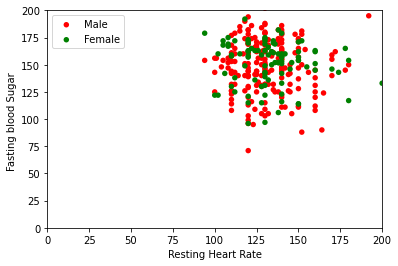

In [74]:
# Resting Heart Rate & Fasting blood sugar in Male Patients and Female

thinkplot.Scatter(male.trestbps, male.thalach, alpha=1.0, label = 'Male', color = 'RED')
thinkplot.Scatter(female.trestbps, female.thalach, alpha=1.0, label = 'Female', color = 'GREEN')
thinkplot.Config(xlabel='Resting Heart Rate',
                 ylabel='Fasting blood Sugar ',
                 axis=[0, 200, 0, 200],
                 legend=True, loc='upper left')

In [76]:
display("Male - Covariance between exercise induced angina & fasting blood Sugar",
        np.cov(male.exang,male.fbs))
display("Male - Correlation Coefficient between exercise induced angina & fasting blood Sugar",
        np.corrcoef(male.exang, male.fbs))
display("Female - Covariance between exercise induced angina & fasting blood Sugar",
        np.cov(female.exang,female.fbs))
display("Female - Correlation Coefficient between exercise induced angina & fasting blood Sugar",
        np.corrcoef(female.exang, female.fbs))

'Male - Covariance between exercise induced angina & fasting blood Sugar'

array([[ 0.23474509, -0.00619108],
       [-0.00619108,  0.13465597]])

'Male - Correlation Coefficient between exercise induced angina & fasting blood Sugar'

array([[ 1.        , -0.03482213],
       [-0.03482213,  1.        ]])

'Female - Covariance between exercise induced angina & fasting blood Sugar'

array([[0.17850877, 0.02368421],
       [0.02368421, 0.11052632]])

'Female - Correlation Coefficient between exercise induced angina & fasting blood Sugar'

array([[1.        , 0.16861503],
       [0.16861503, 1.        ]])

In [98]:

# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

# To test the hypothesis we will check means of the both
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        #display("1", group1.mean(),"2", group2.mean())
        test_stat = (group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


data = male.exang.values, female.exang.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.006

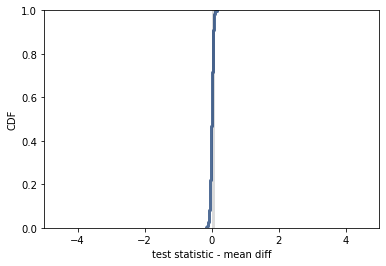

In [85]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic - mean diff', axis=[-5, 5, 0, 1],
                   ylabel='CDF')

In [79]:

data = male.fbs.values, female.fbs.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.284

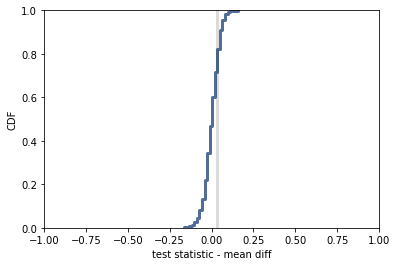

In [80]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic - mean diff', axis=[-1, 1, 0, 1],
                   ylabel='CDF')

In [86]:
def RunTests(clinical_df, iters=1000):
    
    n = len(clinical_df)

    data = male.trestbps.values, female.trestbps.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)
    
    data = (male.fbs.values,
            female.fbs.values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)
    
    print('%d\t%0.2f\t%0.2f' % (n, p1, p2))

In [87]:
n = len(clinical_df)
for _ in range(7):
    sample = thinkstats2.SampleRows(clinical_df, n)
    RunTests(sample)
    n //= 2

303	0.83	0.27
151	0.85	0.27
75	0.85	0.28
37	0.83	0.27
18	0.83	0.29
9	0.82	0.26
4	0.83	0.28


Conclusion: The tests for test1, test2 are positive throughout. However this pattern may change if we could get large datasets. This is not evident, this is only my assumption as 303 is a very small number of patients that we are using for this hypothesis. Still based on our data, we may say our hypothesis is right.

In [93]:
# For this project, conduct a regression analysis on either one dependent and one explanatory variable,
# or multiple explanatory variables (Chapter 10 & 11)

import statsmodels.formula.api as smf
import pandas as pd

formula = 'target ~ trestbps + fbs + exang+age'
model = smf.logit(formula, data=clinical_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.566335
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.1782
Time:                        12:42:01   Log-Likelihood:                -171.60
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.619e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8236      1.206      4.001      0.000       2.461       7.186
trestbps      -0.0109      0.008     -1.354      0.176      -0.027       0.005
fbs            0.1064      0.369      0.288      0.773      -0.618       0.831
exang         -2.0211      0.290     -6.966      0.000      -2.590      -1.452
age           -0.0470      0.016     -3.021      0.003      -0.078      -0.017
==============================================================================
"""

In [94]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)
actual = endog['target']

In [95]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(136.0, 76.0)

In [96]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.6996699669966997

The above model shows and accuracy of 70%

In [97]:
# We may provide values here to predict the mortality
columns = ['trestbps', 'fbs', 'exang', 'age']
new = pd.DataFrame([[90, 120, 1.3, 35]], columns=columns)
y = results.predict(new)
y

0    0.999996
dtype: float64